In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
sns.set(font_scale=1.3, style="ticks")

In [15]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

In [16]:
def cleanup(df):
    """
    Cleanup of df data.
    Dataset specific.
    """
    def _replace(df, column, str1, str2):
        if column in df:
            df[column] = df[column].str.replace(str1, str2)
            
    def _to_num(df, column):
        if column in df:
            df[column] = pd.to_numeric(df[column])
        
    _replace(df, "flow_size", "tcpreplay -i data -tK --loop 40000 --preload-pcap /pcaps/smallFlows.pcap", "0")   
    _replace(df, "flow_size", "tcpreplay -i data -tK --loop 40000 --preload-pcap /pcaps/bigFlows.pcap", "1")
    _to_num(df, "flow_size")
    _replace(df, "ruleset", "./start.sh small_ruleset", "1")
    _replace(df, "ruleset", "./start.sh big_ruleset", "2")
    _replace(df, "ruleset", "./start.sh", "0")
    _to_num(df, "ruleset")
    _replace(df, "req_size", "ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i http://20.0.0.254:8888/", "0")
    _replace(df, "req_size", "ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k http://20.0.0.254:8888/bunny.mp4", "1")
    _replace(df, "req_size", "ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i -X 20.0.0.254:3128 http://40.0.0.254:80/", "0")
    _replace(df, "req_size", "ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -X 20.0.0.254:3128 http://40.0.0.254:80/bunny.mp4", "1")
    _to_num(df, "req_size")
    _replace(df, "req_type", "malaria publish -t -n 20000 -H 20.0.0.254 -q 1 --json /tngbench_share/malaria.json", "0")
    _replace(df, "req_type", "malaria publish -t -n 20000 -H 20.0.0.254 -q 2 --json /tngbench_share/malaria.json", "1")
    _replace(df, "req_type", "malaria publish -s 10 -n 20000 -H 20.0.0.254 --json /tngbench_share/malaria.json", "2")
    _replace(df, "req_type", "malaria publish -s 10000 -n 20000 -H 20.0.0.254 --json /tngbench_share/malaria.json", "3")
    _to_num(df, "req_type")



In [17]:
df_iot01 = pd.read_csv("../data/dataIoT/csv_experiments_IOT01.csv")

In [18]:
map_iot01 = {
    "param__func__mp.input__cmd_start": "req_type",
    "param__func__de.upb.broker-mosquitto.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.broker-mosquitto.0.1__mem_max": "memory",
    #"metric__mp.input.vdu01.0__malaria_clientid": "mal_id",
    #"metric__mp.input.vdu01.0__malaria_count_ok": "mal_count_ok",
    #"metric__mp.input.vdu01.0__malaria_count_total": "mal_count_total",
    "metric__mp.input.vdu01.0__malaria_msgs_per_sec": "msg_per_sec",
    #"metric__mp.input.vdu01.0__malaria_rate_ok": "mal_rate_ok",
    #"metric__mp.input.vdu01.0__malaria_time_max": "mal_time_max",
    "metric__mp.input.vdu01.0__malaria_time_mean": "msg_t_mean",
    #"metric__mp.input.vdu01.0__malaria_time_min": "mal_time_min",
    "metric__mp.input.vdu01.0__malaria_time_stddev": "msg_t_std",
    #"metric__mp.input.vdu01.0__malaria_time_total": "mal_time_total",
    #"metric__mp.output.vdu01.0__malaria_client_count": "mal_ccount",
    #"metric__mp.output.vdu01.0__malaria_clientid": "mal_cid2",
    #"metric__mp.output.vdu01.0__malaria_flight_time_max": "mal_ft_max",
    #"metric__mp.output.vdu01.0__malaria_flight_time_mean": "mal_ft_mean",
    #"metric__mp.output.vdu01.0__malaria_flight_time_min": "mal_ft_min",
    #"metric__mp.output.vdu01.0__malaria_flight_time_stddev": "mal_ft_stddev",
    #"metric__mp.output.vdu01.0__malaria_ms_per_msg": "mal_ms_per_msg",
    #"metric__mp.output.vdu01.0__malaria_msg_count": "mal_out_msg_count",
    #"metric__mp.output.vdu01.0__malaria_msg_duplicates": "mal_out_msg_dup",
    #"metric__mp.output.vdu01.0__malaria_msg_per_sec": "mal_out_msgs_per_sec",
    #"metric__mp.output.vdu01.0__malaria_test_complete": "mal_test_complete",
    #"metric__mp.output.vdu01.0__malaria_time_total": "mal_out_t_total",
    "metric__vnf0.vdu01.0__stat__input__rx_bytes": "if_rx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__rx_dropped": "if_in_rx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__rx_errors": "if_in_rx_errors",
    #"metric__vnf0.vdu01.0__stat__input__rx_packets": "if_in_rx_packets",
    "metric__vnf0.vdu01.0__stat__input__tx_bytes": "if_tx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__tx_dropped": "if_in_tx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__tx_errors": "if_in_tx_errors",
    #"metric__vnf0.vdu01.0__stat__input__tx_packets": "if_in_tx_packets",
}

In [19]:
#add additional data
df_iot01["vnf"] = "mosquitto"

In [46]:
mosquChart= df_iot01.loc[:,['param__func__mp.input__cmd_start','param__func__de.upb.broker-mosquitto.0.1__cpu_bw','param__func__de.upb.broker-mosquitto.0.1__mem_max','metric__mp.input.vdu01.0__malaria_msgs_per_sec','metric__mp.input.vdu01.0__malaria_time_mean','metric__mp.input.vdu01.0__malaria_time_stddev','metric__vnf0.vdu01.0__stat__input__rx_bytes','metric__vnf0.vdu01.0__stat__input__tx_bytes'
,"metric__mp.input.vdu01.0__malaria_count_total", "metric__mp.input.vdu01.0__malaria_time_max", "metric__mp.input.vdu01.0__malaria_time_total", "metric__mp.output.vdu01.0__malaria_flight_time_max", "metric__mp.output.vdu01.0__malaria_test_complete", "metric__vnf0.vdu01.0__stat__input__rx_packets","metric__vnf0.vdu01.0__stat__input__tx_packets"]]

In [47]:
mosquChart.rename(columns = {"param__func__mp.input__cmd_start": "req_type",
    "param__func__de.upb.broker-mosquitto.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.broker-mosquitto.0.1__mem_max": "memory","metric__mp.input.vdu01.0__malaria_msgs_per_sec": "msg_per_sec",
    "metric__mp.input.vdu01.0__malaria_time_mean": "msg_t_mean","metric__mp.input.vdu01.0__malaria_time_stddev": "msg_t_std",
    "metric__vnf0.vdu01.0__stat__input__rx_bytes": "rx_bytes",
    "metric__vnf0.vdu01.0__stat__input__tx_bytes": "tx_bytes",
    "metric__mp.input.vdu01.0__malaria_count_total": "mal_count_total",
    "metric__mp.input.vdu01.0__malaria_time_max": "mal_time_max",
    "metric__mp.input.vdu01.0__malaria_time_total": "mal_time_total",
    "metric__mp.output.vdu01.0__malaria_flight_time_max": "mal_ft_max",
    "metric__mp.output.vdu01.0__malaria_test_complete": "mal_test_complete",
    "metric__vnf0.vdu01.0__stat__input__rx_packets": "rx_packets",
    "metric__vnf0.vdu01.0__stat__input__tx_packets": "if_in_tx_packets",

    }, inplace = True)

mosquChart

,req_type,cpu_bw,memory,msg_per_sec,msg_t_mean,msg_t_std,rx_bytes,tx_bytes,mal_count_total,mal_time_max,mal_time_total,mal_ft_max,mal_test_complete,rx_packets,if_in_tx_packets
0,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1442.486697,3412.720682,1956.545860,1992195.0,118174.0,10000,5593.250036,14.019541,6.009318,False,2086.0,1185.0
1,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1414.498769,3756.159934,2013.793888,1989689.0,116548.0,10000,5973.675966,14.018342,6.869280,False,2060.0,1160.0
2,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1444.074802,3317.213071,1965.811853,1991120.0,117316.0,10000,5536.617994,17.021587,6.334266,False,2085.0,1172.0
3,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1440.336513,3657.318589,2044.054350,1992640.0,119428.0,10000,5938.068867,17.021670,6.262163,False,2111.0,1204.0
4,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1438.958843,3464.631551,1985.075934,1989019.0,115756.0,10000,5673.784018,13.017407,NaN,NaN,2065.0,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,329.944637,2.839258,1.130028,101375257.0,709558.0,10000,41.346073,34.038315,NaN,NaN,10024.0,10145.0
1596,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,327.484944,2.590731,6.009621,101349936.0,784348.0,10000,579.529047,34.037556,NaN,NaN,10032.0,11278.0
1597,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,339.133717,2.803832,1.448154,101290644.0,705994.0,10000,42.486906,33.037925,NaN,NaN,10032.0,10091.0
1598,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,329.418297,3.003782,2.136913,101402911.0,697588.0,10000,44.168949,41.048656,NaN,NaN,10038.0,9964.0


In [39]:
df3= mosquChart.replace(np.nan,0) #now that I have only float/int values, i can replace the NaN values with 0
#df3["mal_test_complete"]= df3["mal_test_complete"].replace(to_replace=["FALSE"],value=[0])
df3

,req_type,cpu_bw,memory,msg_per_sec,msg_t_mean,msg_t_std,rx_bytes,tx_bytes,mal_count_total,mal_time_max,mal_time_total,mal_ft_max,mal_test_complete,rx_packets,if_in_tx_packets
0,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1442.486697,3412.720682,1956.545860,1992195.0,118174.0,10000,5593.250036,14.019541,6.009318,False,2086.0,1185.0
1,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1414.498769,3756.159934,2013.793888,1989689.0,116548.0,10000,5973.675966,14.018342,6.869280,False,2060.0,1160.0
2,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1444.074802,3317.213071,1965.811853,1991120.0,117316.0,10000,5536.617994,17.021587,6.334266,False,2085.0,1172.0
3,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1440.336513,3657.318589,2044.054350,1992640.0,119428.0,10000,5938.068867,17.021670,6.262163,False,2111.0,1204.0
4,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1438.958843,3464.631551,1985.075934,1989019.0,115756.0,10000,5673.784018,13.017407,0.000000,0,2065.0,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,329.944637,2.839258,1.130028,101375257.0,709558.0,10000,41.346073,34.038315,0.000000,0,10024.0,10145.0
1596,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,327.484944,2.590731,6.009621,101349936.0,784348.0,10000,579.529047,34.037556,0.000000,0,10032.0,11278.0
1597,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,339.133717,2.803832,1.448154,101290644.0,705994.0,10000,42.486906,33.037925,0.000000,0,10032.0,10091.0
1598,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,329.418297,3.003782,2.136913,101402911.0,697588.0,10000,44.168949,41.048656,0.000000,0,10038.0,9964.0


In [44]:
df3.to_csv('MOSQUITTO_data_chart.csv', index=False)  #per facilitare la graficazione

In [20]:
df=df_iot01.loc[:,['param__func__mp.input__cmd_start','param__func__de.upb.broker-mosquitto.0.1__cpu_bw','param__func__de.upb.broker-mosquitto.0.1__mem_max','metric__mp.input.vdu01.0__malaria_msgs_per_sec','metric__mp.input.vdu01.0__malaria_time_mean','metric__mp.input.vdu01.0__malaria_time_stddev','metric__vnf0.vdu01.0__stat__input__rx_bytes','metric__vnf0.vdu01.0__stat__input__tx_bytes']] #'param__func__mp.input__cmd_start','param__func__de.upb.broker-mosquitto.0.1__cpu_bw','param__func__de.upb.broker-mosquitto.0.1__mem_max','metric__mp.input.vdu01.0__malaria_msgs_per_sec','metric__mp.input.vdu01.0__malaria_time_mean','metric__mp.input.vdu01.0__malaria_time_stddev','metric__vnf0.vdu01.0__stat__input__rx_bytes','metric__vnf0.vdu01.0__stat__input__tx_bytes'
df

,param__func__mp.input__cmd_start,param__func__de.upb.broker-mosquitto.0.1__cpu_bw,param__func__de.upb.broker-mosquitto.0.1__mem_max,metric__mp.input.vdu01.0__malaria_msgs_per_sec,metric__mp.input.vdu01.0__malaria_time_mean,metric__mp.input.vdu01.0__malaria_time_stddev,metric__vnf0.vdu01.0__stat__input__rx_bytes,metric__vnf0.vdu01.0__stat__input__tx_bytes
0,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1442.486697,3412.720682,1956.545860,1992195.0,118174.0
1,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1414.498769,3756.159934,2013.793888,1989689.0,116548.0
2,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1444.074802,3317.213071,1965.811853,1991120.0,117316.0
3,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1440.336513,3657.318589,2044.054350,1992640.0,119428.0
4,malaria publish -t -n 10000 -H 20.0.0.254 -q 1...,0.1,64,1438.958843,3464.631551,1985.075934,1989019.0,115756.0
...,...,...,...,...,...,...,...,...
1595,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,329.944637,2.839258,1.130028,101375257.0,709558.0
1596,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,327.484944,2.590731,6.009621,101349936.0,784348.0
1597,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,339.133717,2.803832,1.448154,101290644.0,705994.0
1598,malaria publish -s 10000 -n 10000 -H 20.0.0.25...,1.0,512,329.418297,3.003782,2.136913,101402911.0,697588.0


Mosquitto IOT
-0.9510701655845235 ('msg_t_std', 'rx_bytes')


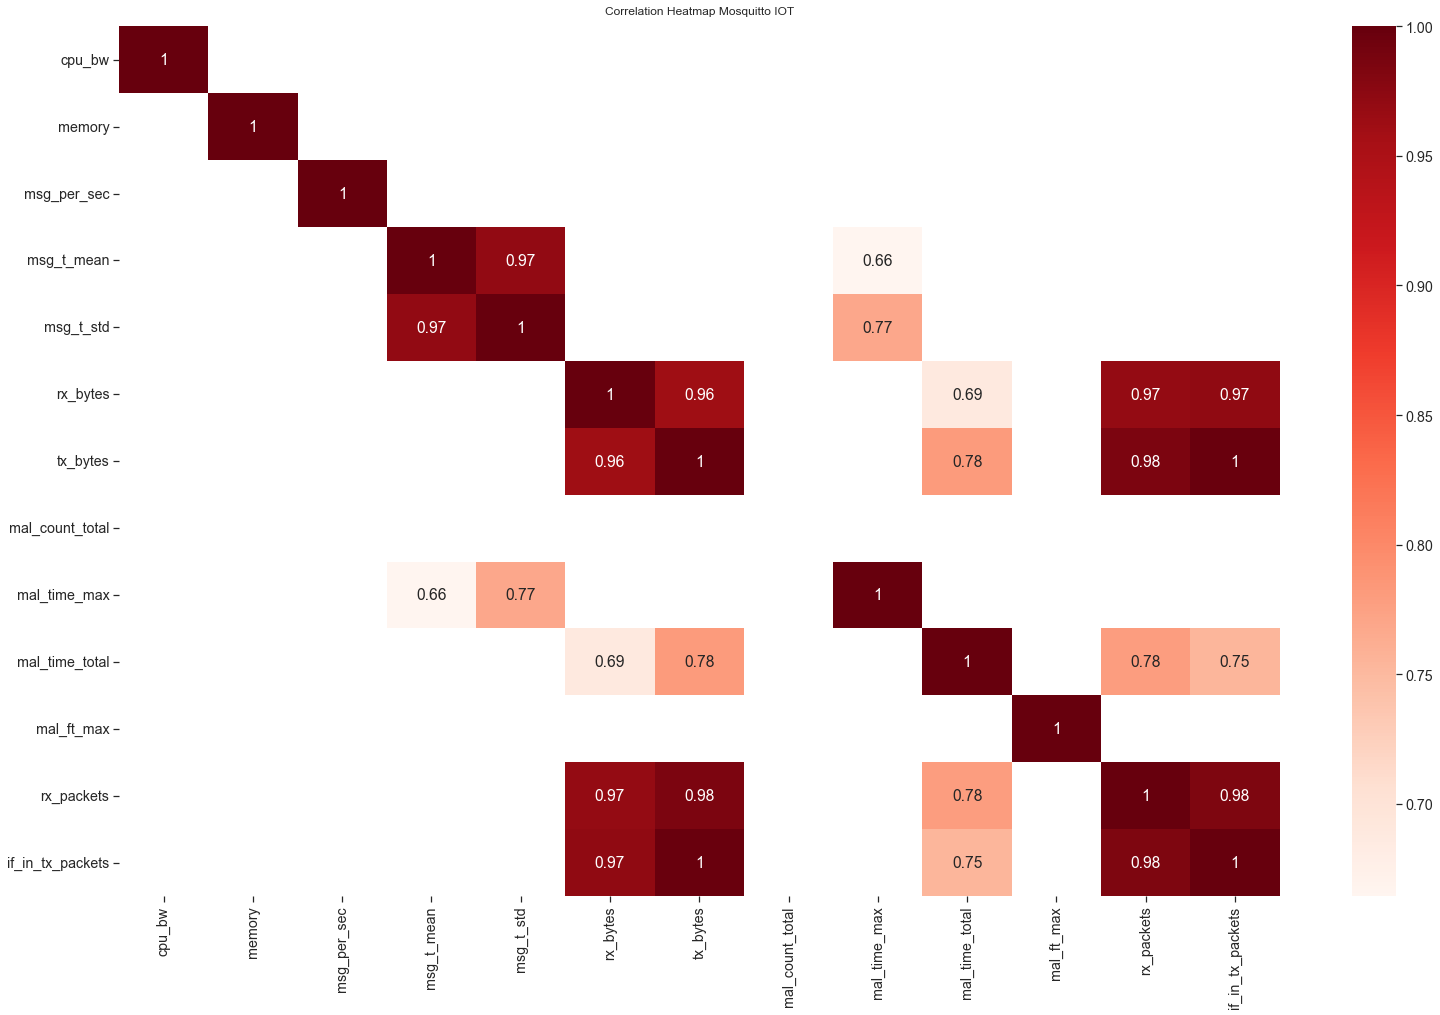

In [43]:
corr_matrix(df3, "Mosquitto IOT", True, threshold=0.5)


In [21]:
df.rename(columns = {"param__func__mp.input__cmd_start": "req_type",
    "param__func__de.upb.broker-mosquitto.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.broker-mosquitto.0.1__mem_max": "memory","metric__mp.input.vdu01.0__malaria_msgs_per_sec": "msg_per_sec",
    "metric__mp.input.vdu01.0__malaria_time_mean": "msg_t_mean","metric__mp.input.vdu01.0__malaria_time_stddev": "msg_t_std",
    "metric__vnf0.vdu01.0__stat__input__rx_bytes": "rx_bytes",
    "metric__vnf0.vdu01.0__stat__input__tx_bytes": "tx_bytes",
    }, inplace = True)


In [40]:
# CORRELATION MATRIX

def corr_matrix(df, metric, ylabels, threshold):
    plt.figure(figsize=(26, 16))
    # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
    # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    #print(get_top_abs_correlations(df, df.corr().shape[0]))
    corr = df.corr()
    print(metric)
    print(corr.unstack().min(), corr.unstack().idxmin())
    kot = corr[corr>=threshold]
    heatmap = sns.heatmap(kot, cmap="Reds", annot=True, yticklabels=ylabels)
    heatmap.set_title('Correlation Heatmap '+str(metric), fontdict={'fontsize':12}, pad=12)

IOT 01
-0.9510701655845235 ('msg_t_std', 'rx_bytes')


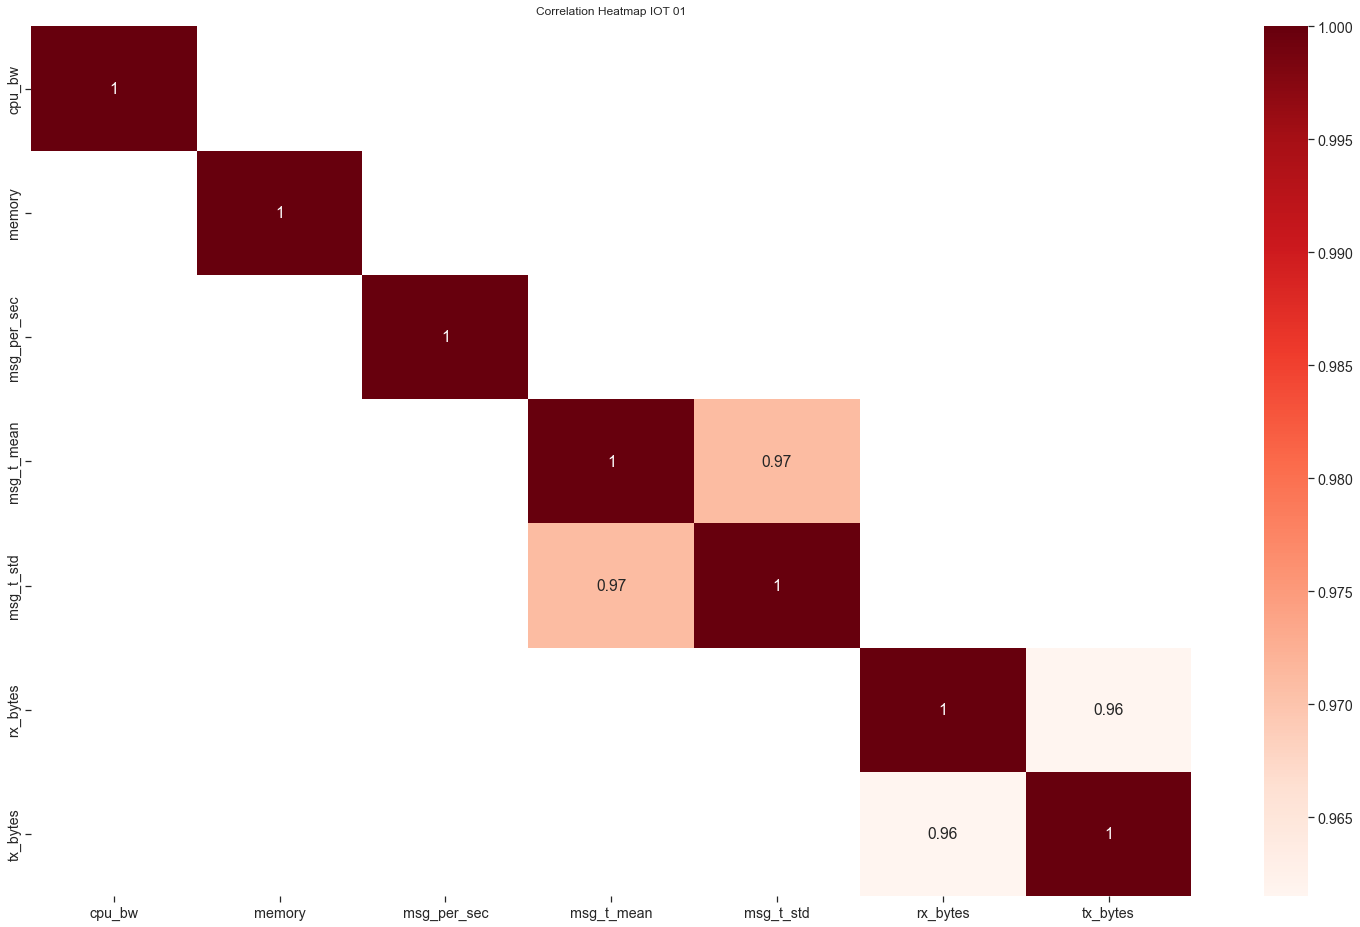

In [23]:
corr_matrix(df, "IOT 01", True, threshold=0.5)


In [ ]:
# work in progress...

import pwlf
from sklearn import metrics as em

def plot_figs2(legend,metrics,subplots,dim_x_plot,dim_y_plot,segment):
    count_mem=0
    count_subfig=0
    fig, axs = plt.subplots(2*len(metrics), subplots)
    plt.rcParams["figure.figsize"] = (dim_x_plot,dim_y_plot)
    for metric in enumerate(metrics):
            print(metric)
            list = dfs[0].memory.unique()
            for memory in list:
                count_subfig=0
                for req in  dfs[0].req_type.unique():
                            y = dfs[0][(dfs[0]["req_type"]==req) & (dfs[0]["memory"]==memory)]["cpu_bw"]
                            x = dfs[0][(dfs[0]["req_type"]==req)  & (dfs[0]["memory"]==memory)][metric[1]]
                            f = pwlf.PiecewiseLinFit(x, y)
                            f.fit(segment)
                            

                            xHat = np.linspace(min(x), max(x), num=len(y))
                            yHat = f.predict(xHat)
                            mse = em.mean_squared_error(y, yHat)
                            axs[count_mem, count_subfig].plot(y,x, 'o')
                            axs[count_mem, count_subfig].plot(yHat, xHat, '-')
                            axs[count_mem, count_subfig].set_title("memory="+str(memory)+" - req_type: "+str(req)+" - mse: "+str(round(mse,4)))
                            axs[count_mem,count_subfig].set_ylabel(metric[1])
                            for ax in axs.flat:
                                ax.set(xlabel='cpu_bw')
                                ax.legend(legend)
                                ax.set_yscale("log")
                                ax.label_outer()
                            count_subfig+=1
                count_mem+=1

In [ ]:
for element in ['msg_t_mean' , 'msg_t_std' ,'if_rx_bytes' , 'if_tx_bytes']:
    if(dfs[0][element].isnull().any()):
        dfs[0].dropna(how='all',subset=element,axis=0, inplace=True)
    plot_figs2([ "Mosquitto"],[element],4,20,10,4)